# Setup

## Instructions
1. Download this notebook, and open in it in Jupyer, JupyerLab, VSCode, etc.

In [1]:
!pip install -U pairplots

DEPRECATION: Loading egg at /Users/thompsonw/anaconda3/lib/python3.11/site-packages/pairplots-2.3.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/thompsonw/anaconda3/lib/python3.11/site-packages/octofitterpy-2.3.3-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..
DEPRECATION: Loading egg at /Users/thompsonw/anaconda3/lib/python3.11/site-packages/octofitterpy-2.3.2-py3.11.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


The first time you import octofitterpy, we will automatically install Julia (via JuliaUp) and compile Octofitter.jl in a self-contained environment. Subsequent imports will be faster.

In [2]:
%cd ..

/Users/thompsonw/Documents/pairplots


In [3]:
import pairplots
import numpy as np

[juliapkg] Locating Julia =1.10.0
[juliapkg] Using Julia 1.10.0 at /Users/thompsonw/.julia/juliaup/julia-1.10.0+0.aarch64.apple.darwin14/bin/julia
[juliapkg] Using Julia project at /Users/thompsonw/anaconda3/julia_env
[juliapkg] Installing packages:
           julia> import Pkg
           julia> Pkg.add([Pkg.PackageSpec(name="PythonCall", uuid="6099a3de-0909-46bc-b1f4-468b9a2dfc0d"), Pkg.PackageSpec(name="PairPlots", uuid="43a3c2be-4208-490b-832a-a21dcd55d7da"), Pkg.PackageSpec(name="Makie", uuid="ee78f7c6-11fb-53f2-987a-cfe4a2b5a57a"), Pkg.PackageSpec(name="CairoMakie", uuid="13f3f980-e62b-5c42-98c6-ff1f3baf88f0"), Pkg.PackageSpec(name="GLMakie", uuid="e9467ef8-e4e7-5192-8a1a-b1aee30e663a")])
           julia> Pkg.resolve()
           julia> Pkg.precompile()


   Resolving package versions...
    Updating `~/anaconda3/julia_env/Project.toml`
  [13f3f980] + CairoMakie v0.11.9
  [e9467ef8] + GLMakie v0.9.9
  [ee78f7c6] + Makie v0.20.8
  [43a3c2be] + PairPlots v2.7.0
  [6099a3de] + PythonCall v0.9.19
    Updating `~/anaconda3/julia_env/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [398f06c4] + AbstractLattices v0.3.0
  [1520ce14] + AbstractTrees v0.4.5
  [79e6a3ab] + Adapt v4.0.4
  [27a7e980] + Animations v0.4.1
  [4fba245c] + ArrayInterface v7.9.0
  [67c07d97] + Automa v1.0.3
  [13072b0f] + AxisAlgorithms v1.1.0
  [39de3d68] + AxisArrays v0.4.7
  [fa961155] + CEnum v0.5.0
  [159f3aea] + Cairo v1.0.5
  [13f3f980] + CairoMakie v0.11.9
  [49dc2e85] + Calculus v0.5.1
  [d360d2e6] + ChainRulesCore v1.23.0
  [a2cac450] + ColorBrewer v0.4.0
  [35d6a980] + ColorSchemes v3.24.0
  [3da002f7] + ColorTypes v0.11.4
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.10
  [861a8166] + Combinatorics v1.0.2
  [bbf7d656] + CommonSubexpres

Detected Jupyter notebook. Loading juliacall extension. Set `PAIRPLOTS_AUTOLOAD_EXTENSIONS=no` to disable.


# Generate sample data

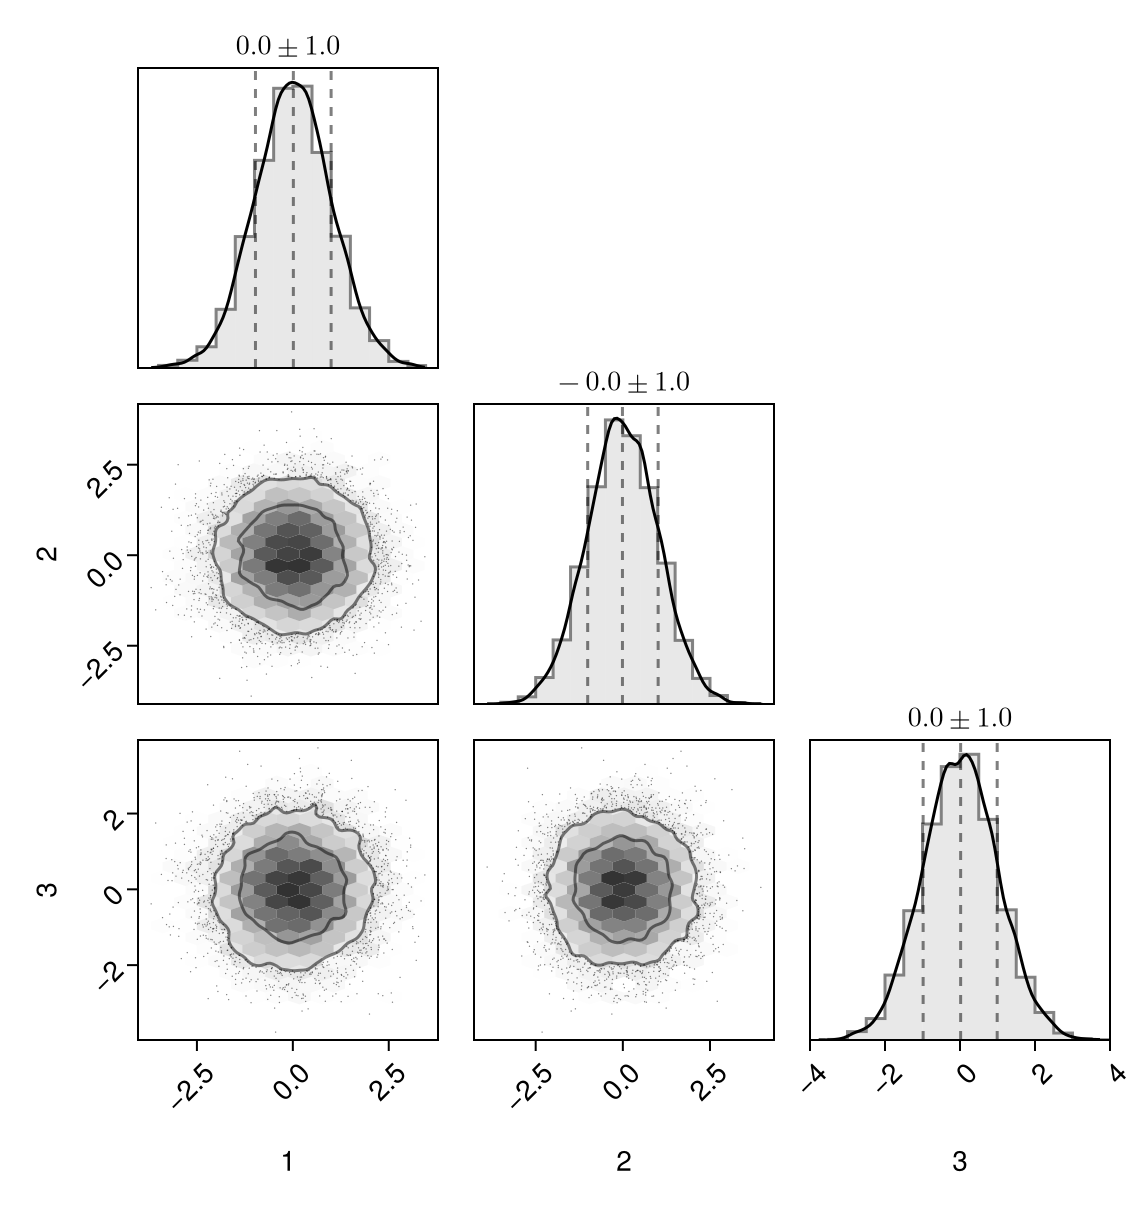

In [5]:
d = np.random.randn(10000,3)
pairplots.pairplot(d)

In [ ]:
pairplots.pairplot_interactive(
    (data, (pairplots.PairPlots.Scatter(),))
)

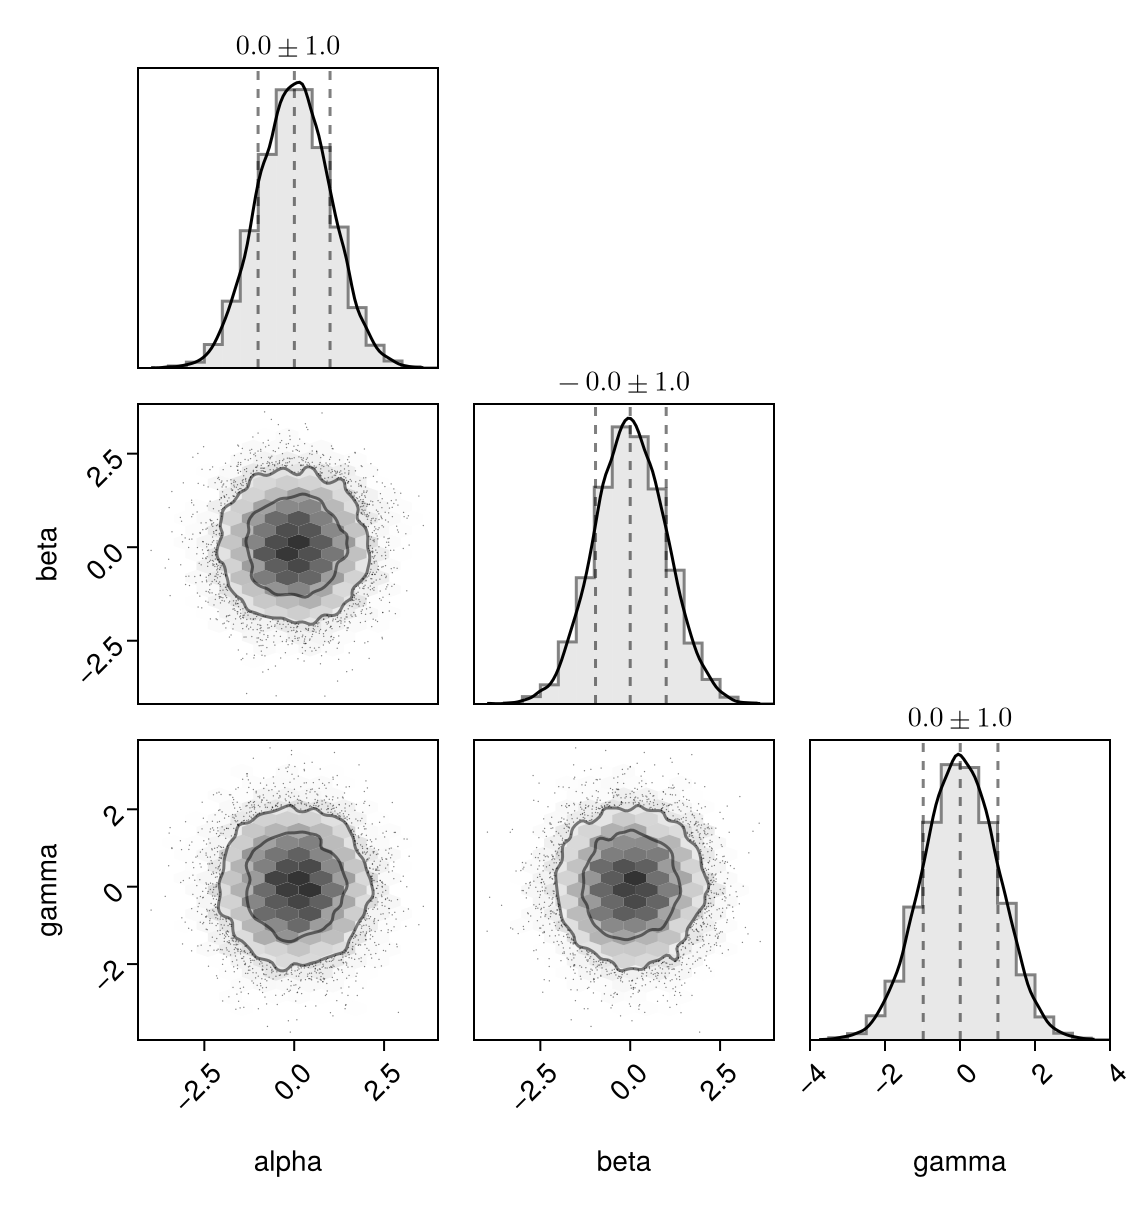

In [7]:
d = np.random.randn(10000,3)
pairplots.pairplot(d, labels=["alpha", "beta", "gamma"])

In [25]:
N = 10000
alpha = np.append([2*np.random.randn(N//2) + 6], [np.random.randn(N//2)])
beta = np.append([3*np.random.randn(N//2)], [2*np.random.randn(N//2)])
gamma = np.random.randn(N)
delta = 0.00001 * (beta + 0.6*np.random.randn(N))

data = np.stack([alpha, beta, gamma, delta]).T

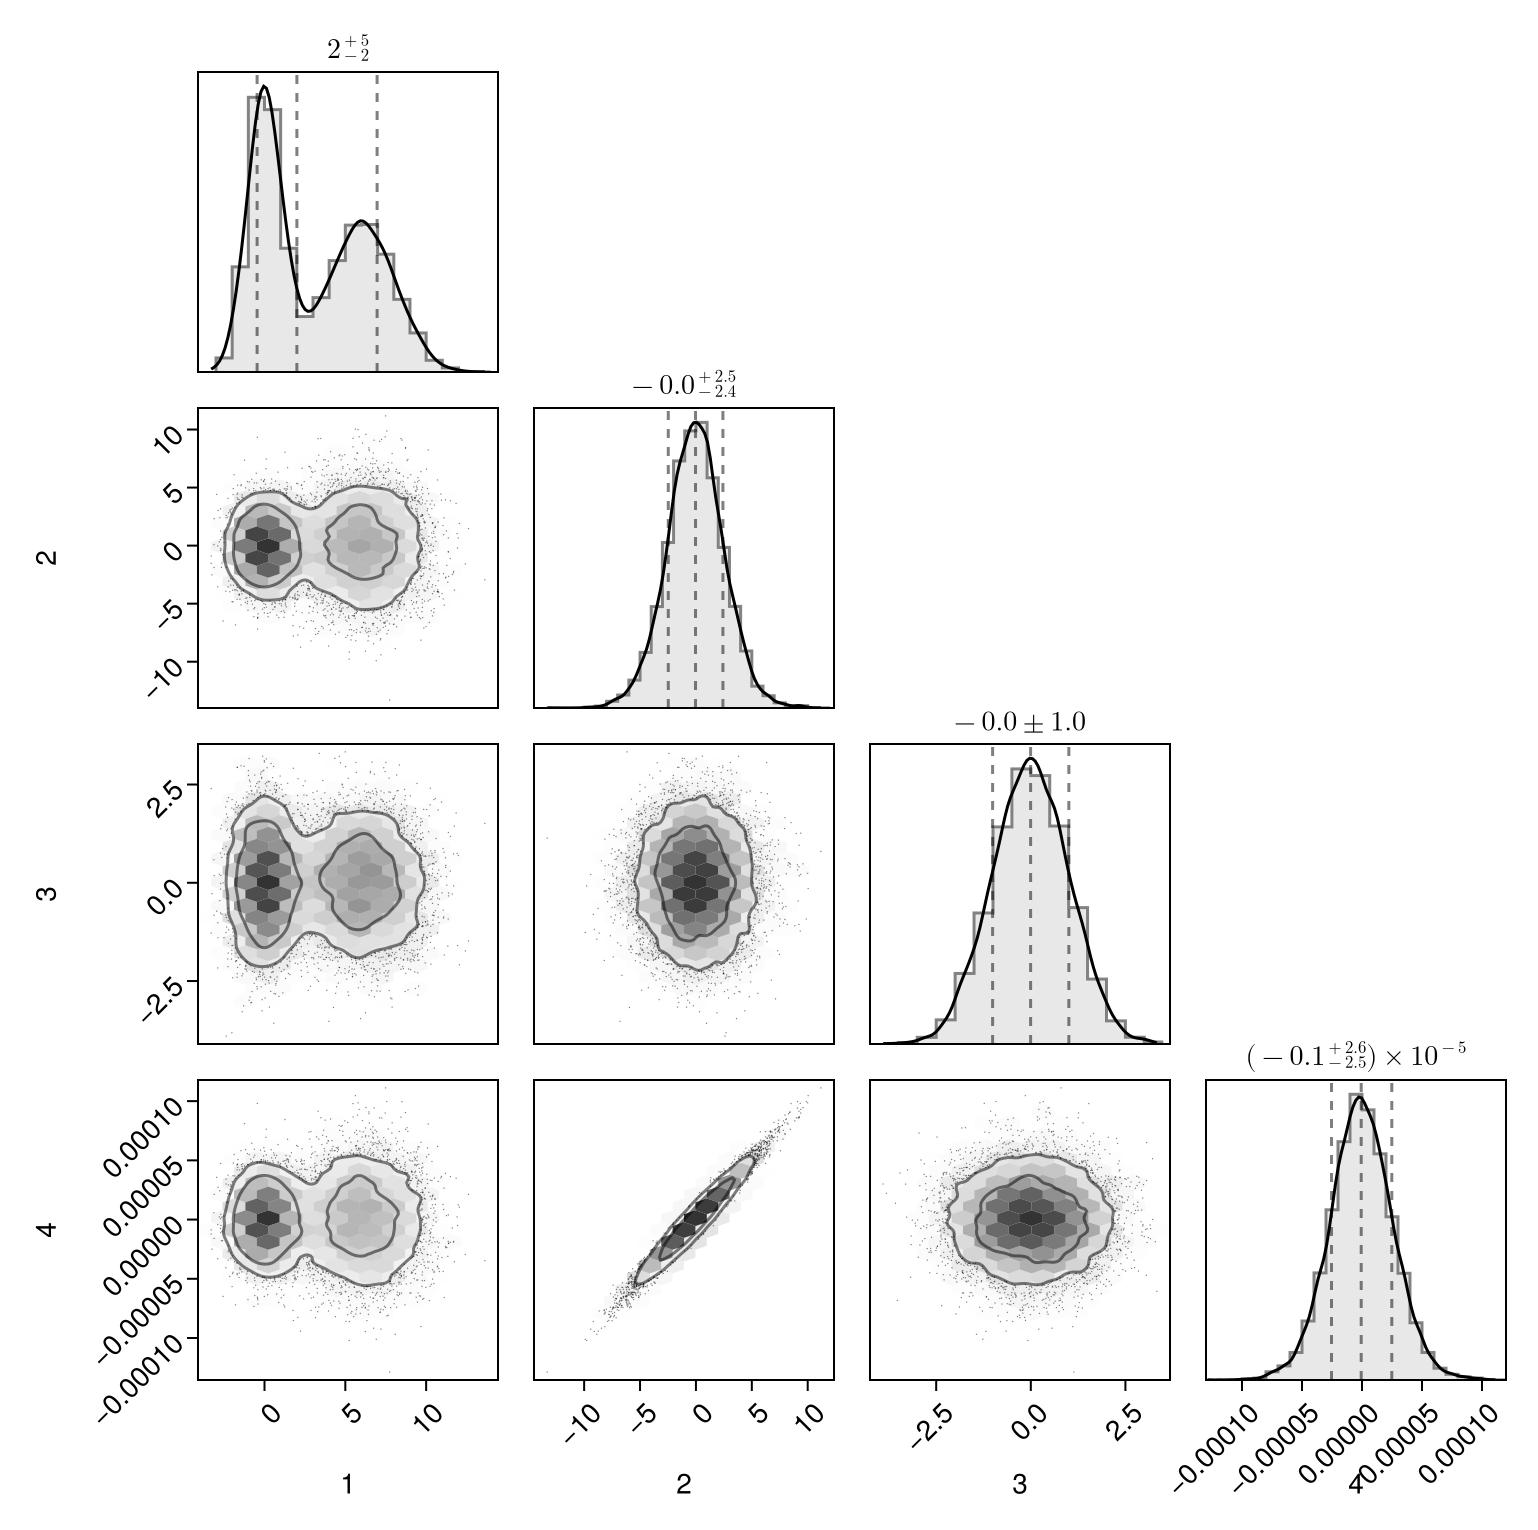

In [26]:
pairplots.pairplot(data)

In [28]:
# Set up the parameters of the problem.
ndim, nsamples = 3, 50000

# Generate some fake data.
np.random.seed(42)
data1 = np.random.randn(ndim * 4 * nsamples // 5).reshape(
    [4 * nsamples // 5, ndim]
)
data2 = 4 * np.random.rand(ndim)[None, :] + np.random.randn(
    ndim * nsamples // 5
).reshape([nsamples // 5, ndim])
data = np.vstack([data1, data2])


figure = pairplots.pairplot(data)

In [29]:
import pandas as pd

my_array = np.array(data)

df = pd.DataFrame(my_array, columns=['Column_A', 'Column_B', 'Column_C'])
df

Column_A  Column_B  Column_C
0      0.496714 -0.138264  0.647689
1      1.523030 -0.234153 -0.234137
2      1.579213  0.767435 -0.469474
3      0.542560 -0.463418 -0.465730
4      0.241962 -1.913280 -1.724918
...         ...       ...       ...
49995  2.569617 -0.006890 -0.687755
49996  4.446717  1.473200  0.735589
49997  2.644546  1.614368  1.114339
49998  1.614456  0.857165  0.844587
49999  4.806824  4.283644  0.342618

[50000 rows x 3 columns]

In [31]:
pairplots.pairplot(
    df,
    labels={
        "Column_A": "AAAA"
    }
)

ValueError: number of labels 1 does not match shape of array (50000, 3)